In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_path = "/atividade3_dataset.xlsx"
df_raw = pd.read_excel(raw_path)
df = df_raw.copy()
df.head()

,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,2010.87,7,2024-05-30
1,2,Bruno,42.0,RIO DE JANEIRO,Teclado,NaN,6,2025-04-12
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,2022-12-10
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,2022-12-31
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,2023-09-14


In [ ]:
buf = []
print(df.info())
print("\nNulos por coluna:\n", df.isna().sum())
print("\nDuplicados (linhas):", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           510 non-null    int64         
 1   Nome         510 non-null    object        
 2   Idade        489 non-null    float64       
 3   Cidade       510 non-null    object        
 4   Produto      510 non-null    object        
 5   Preço        473 non-null    object        
 6   Quantidade   510 non-null    int64         
 7   Data_Compra  510 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 32.0+ KB
None

Nulos por coluna:
 ID              0
Nome            0
Idade          21
Cidade          0
Produto         0
Preço          37
Quantidade      0
Data_Compra     0
dtype: int64

Duplicados (linhas): 8


### Tratamento de Valores Ausentes


In [ ]:
# First, remove duplicates
df.drop_duplicates(inplace=True)

# Convert 'Preço' to numeric, coercing errors to NaN
df['Preço'] = pd.to_numeric(df['Preço'], errors='coerce')

# Fill missing values in 'Idade' and 'Preço'
median_idade = df['Idade'].median()
df['Idade'].fillna(median_idade, inplace=True)

median_preco = df['Preço'].median()
df['Preço'].fillna(median_preco, inplace=True)

print("Nulos após tratamento:\n", df.isna().sum())

Nulos após tratamento:
 ID             0
Nome           0
Idade          0
Cidade         0
Produto        0
Preço          0
Quantidade     0
Data_Compra    0
dtype: int64


/tmp/ipython-input-3961626890.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Idade'].fillna(median_idade, inplace=True)
/tmp/ipython-input-3961626890.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [4]:
df['Data_Compra'] = df['Data_Compra'].dt.date

print("Primeiras linhas após a conversão:")
display(df.head())

print("\nTipos de dados após a conversão:")
print(df.dtypes)

Primeiras linhas após a conversão:


,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,2010.87,7,2024-05-30
1,2,Bruno,42.0,RIO DE JANEIRO,Teclado,NaN,6,2025-04-12
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,2022-12-10
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,2022-12-31
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,2023-09-14



Tipos de dados após a conversão:
ID               int64
Nome            object
Idade          float64
Cidade          object
Produto         object
Preço           object
Quantidade       int64
Data_Compra     object
dtype: object


### Detecção e Remoção de Duplicados

Com base na análise inicial, foram identificadas 8 linhas duplicadas no conjunto de dados. Para garantir a integridade dos dados e evitar análises enviesadas, removeremos estas linhas duplicadas, mantendo apenas a primeira ocorrência de cada linha.

In [ ]:
print("Duplicados (linhas) antes da remoção:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Duplicados (linhas) após a remoção:", df.duplicated().sum())

Duplicados (linhas) antes da remoção: 0
Duplicados (linhas) após a remoção: 0


### Correções Adicionais: Padronização e Tipos de Dados

Verificar se existem valores inconsistentes que precisam ser padronizados, especialmente na coluna 'Cidade'. Também confirmaremos se os tipos de dados das colunas estão corretos.

In [ ]:
print("Valores únicos na coluna 'Cidade':\n", df['Cidade'].unique())

# Exemplo de como padronizar valores (adapte conforme necessário após verificar os valores únicos)
# Ex: Substituir 'SP' por 'SÃO PAULO'
# df['Cidade'] = df['Cidade'].replace({'SP': 'SÃO PAULO'})

print("\nTipos de dados após correções:\n", df.dtypes)

Valores únicos na coluna 'Cidade':
 ['FORTALEZA' 'RIO DE JANEIRO' 'CURITIBA' 'SALVADOR' 'PORTO ALEGRE'
 'SÃO PAULO' 'curitiba' 'MANAUS' 'BELO HORIZONTE' 'rio de janeiro'
 'belo horizonte' 'porto alegre' 'salvador' 'manaus' 'fortaleza'
 'são paulo']

Tipos de dados após correções:
 ID               int64
Nome            object
Idade          float64
Cidade          object
Produto         object
Preço          float64
Quantidade       int64
Data_Compra     object
dtype: object


In [ ]:
print("Missing values in 'Data_Compra':", df['Data_Compra'].isna().sum())

Missing values in 'Data_Compra': 0


### Exploração Inicial: Estatísticas Descritivas

Após a limpeza dos dados, é útil examinar estatísticas descritivas para entender a distribuição, tendência central e dispersão das variáveis numéricas.

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
display(df.describe())
pd.reset_option('display.float_format')

,ID,Idade,Preço,Quantidade
count,501.00,501.00,501.00,501.00
mean,250.14,44.32,60192415172620.79,5.75
std,144.56,15.04,1347288591513336.25,2.86
min,1.00,18.00,509.89,1.00
25%,125.00,32.00,1772.05,3.00
50%,250.00,44.50,2731.26,6.00
75%,375.00,57.00,3524.64,8.00
max,500.00,70.00,30156399999999900.00,10.00


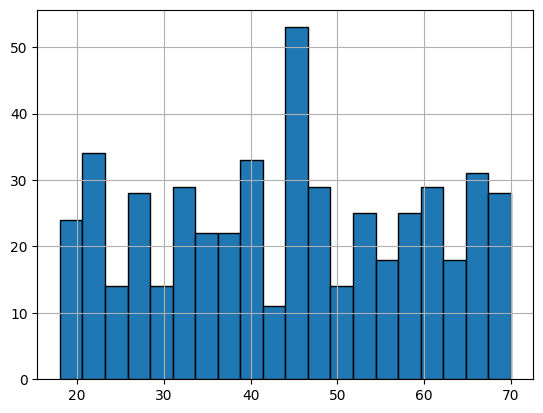

In [ ]:
plt.hist(df['Idade'], bins=20, edgecolor='black')
plt.grid(True)
plt.show()

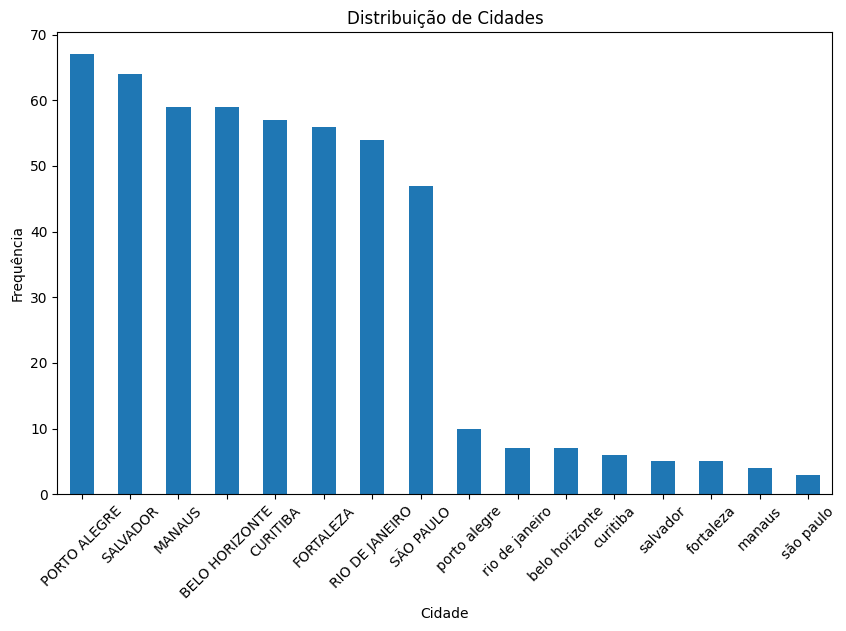

In [5]:
df['Cidade'].value_counts().plot.bar(figsize=(10, 6))
plt.title('Distribuição de Cidades')
plt.xlabel('Cidade')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()